### Using H5PY package to analyze LIGO data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
fileName = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

In [4]:
for key in dataFile.keys():
    print(key)

meta
quality
strain


In [5]:
# Meta data = GPS times covered
# Quality = data quality
# Strain = interferometer data
strain = dataFile['strain']['Strain'].value
ts = dataFile['strain']['Strain'].attrs['Xspacing']

/opt/conda/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [44]:
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print(key, meta[key].value)
    
### Hanford 1 detector for at 4096 Hz
### At GPS coordinates 815411200

Description b'Strain data time series from LIGO'
DescriptionURL b'http://losc.ligo.org/'
Detector b'H1'
Duration 4096
GPSstart 815411200
Observatory b'H'
Type b'StrainTimeSeries'
UTCstart b'2005-11-07T15:06:27'


In [7]:
gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd   = gpsStart + duration
time = np.arange(gpsStart, gpsEnd, ts)

In [19]:
%matplotlib Notebook

<IPython.core.display.Javascript object>


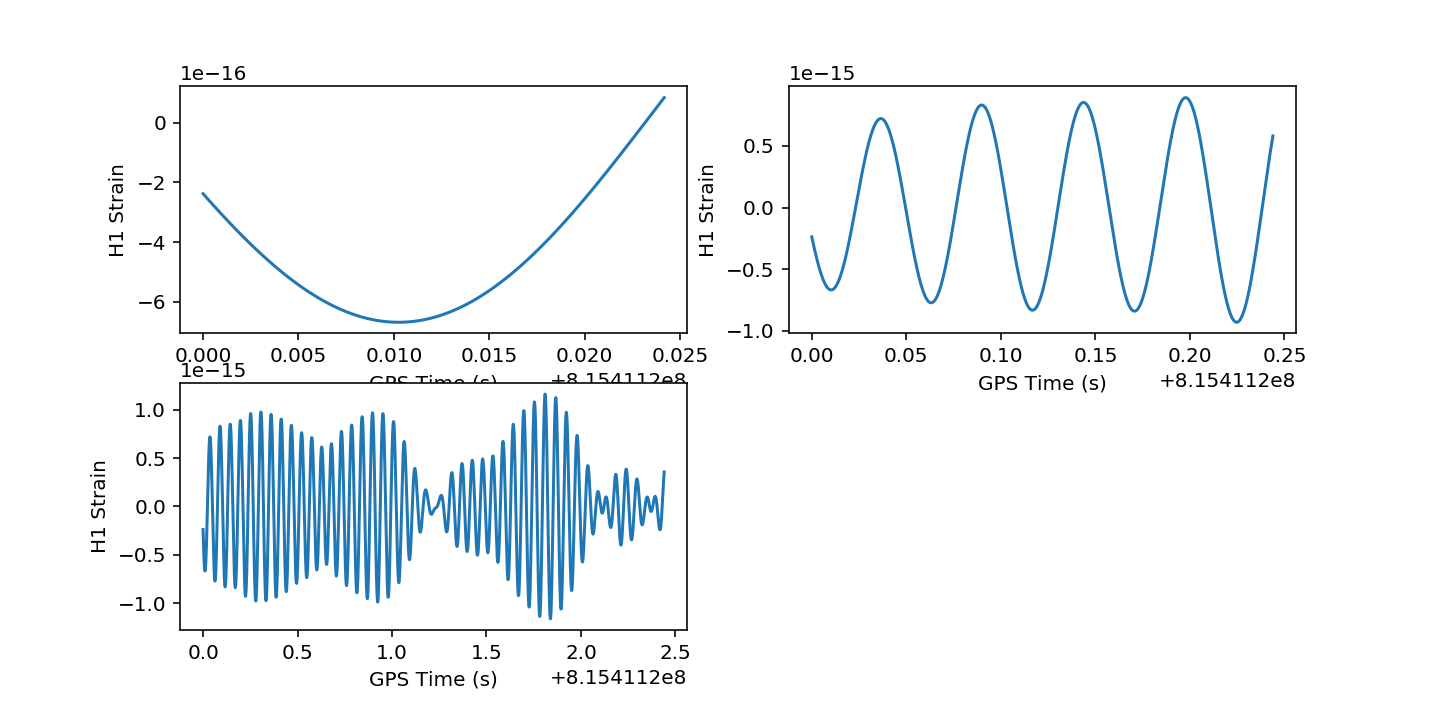

In [35]:
plt.figure(1,figsize=(10,5))
#plt.figure(2,figsize=(10,5))

numSamples1 = 100
plt.subplot(2,2,1)
plt.plot(time[0:numSamples1], strain[0:numSamples1])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

plt.subplot(2,2,2)
numSamples2 = 1000
plt.plot(time[0:numSamples2], strain[0:numSamples2])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

plt.subplot(2,2,3)
numSamples3 = 10000
plt.plot(time[0:numSamples3], strain[0:numSamples3])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

<IPython.core.display.Javascript object>


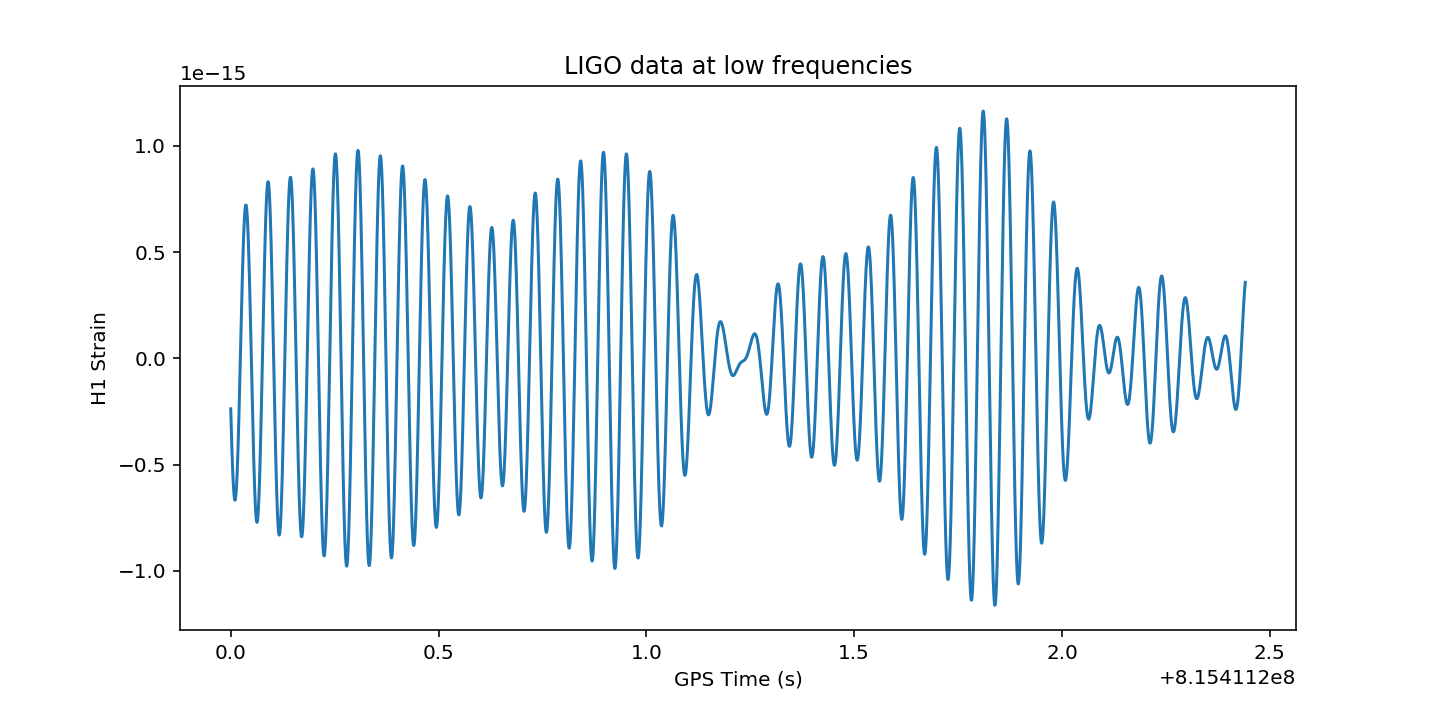

In [40]:
plt.figure(figsize=(10,5))
numSamples4 = 10000
plt.plot(time[0:numSamples4], strain[0:numSamples4])
plt.title('LIGO data at low frequencies')
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

In [43]:
dataQualityInfo = dataFile['quality']['simple']
bitnameList = dataQualityInfo['DQShortnames'].value
nbits = len(bitnameList)

for bit in range(nbits):
    print(bit, bitnameList[bit])

0 b'DATA'
1 b'CBCHIGH_CAT1'
2 b'CBCHIGH_CAT2'
3 b'CBCHIGH_CAT3'
4 b'CBCHIGH_CAT4'
5 b'CBCLOW_CAT1'
6 b'CBCLOW_CAT2'
7 b'CBCLOW_CAT3'
8 b'CBCLOW_CAT4'
9 b'BURST_CAT1'
10 b'BURST_CAT2'
11 b'BURST_CAT3'
12 b'BURST_CAT2E'
13 b'BURST_CAT3E'
14 b'CW_CAT1'
15 b'STOCH_CAT1'
16 b'STOCH_CAT2_H1L1'
17 b'STOCH_CAT2_H2L1'


In [48]:
qmask = dataQualityInfo['DQmask'].value

### Detector data is in the sci category
### GO through Burst categories
sci = (qmask >> 0) & 1 
burst1  = (qmask >> 9) & 1

### All the desirable data passed through categories
goodData_1Hz = sci & burst1

<IPython.core.display.Javascript object>


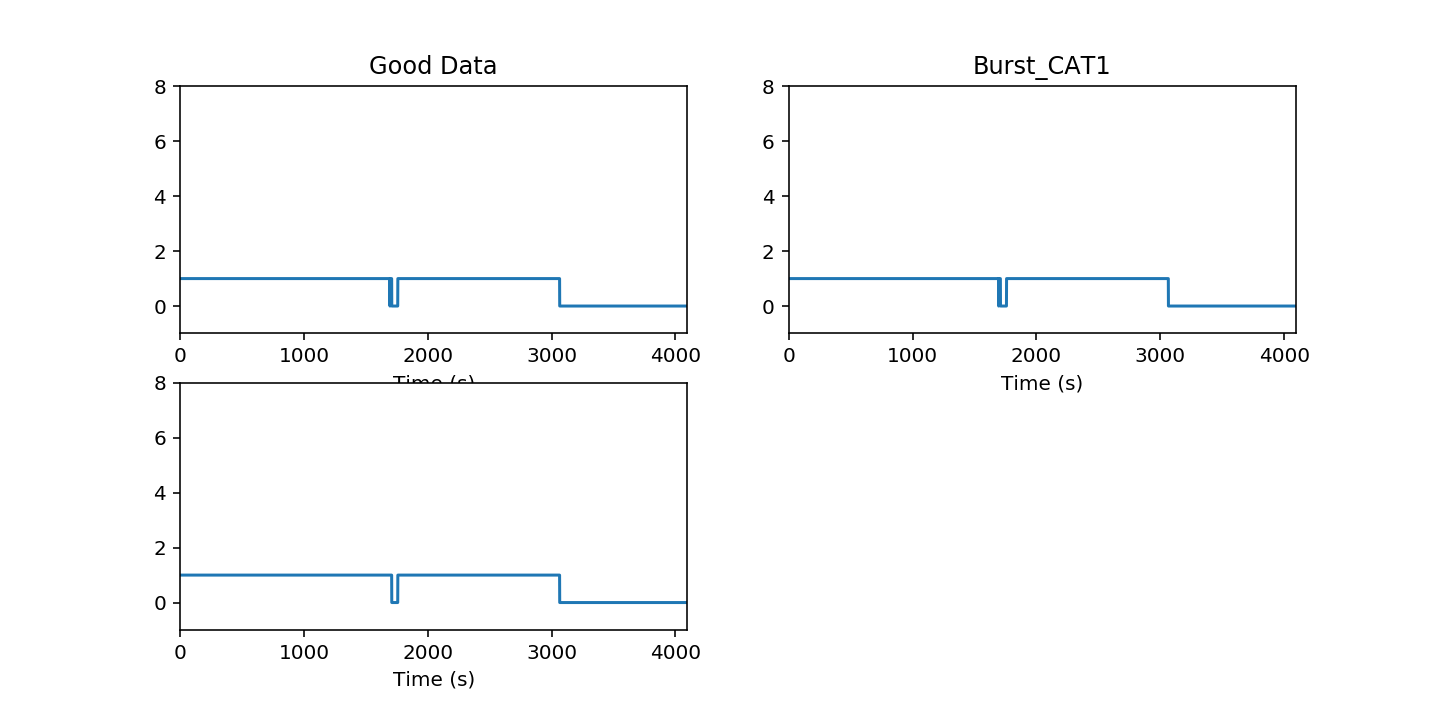

In [56]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.plot(goodData_1Hz)
plt.title('Good Data')
plt.xlabel('Time (s)')
plt.axis([0, 4096, -1, 8])
plt.show()

plt.subplot(2,2,2)
plt.plot(burst1)
plt.title('Burst_CAT1')
plt.xlabel('Time (s)')
plt.axis([0, 4096, -1, 8])
plt.show()

plt.subplot(2,2,3)
plt.plot(sci)
plt.axis([0, 4096, -1, 8])
plt.xlabel('Time (s)')
plt.show()

<IPython.core.display.Javascript object>


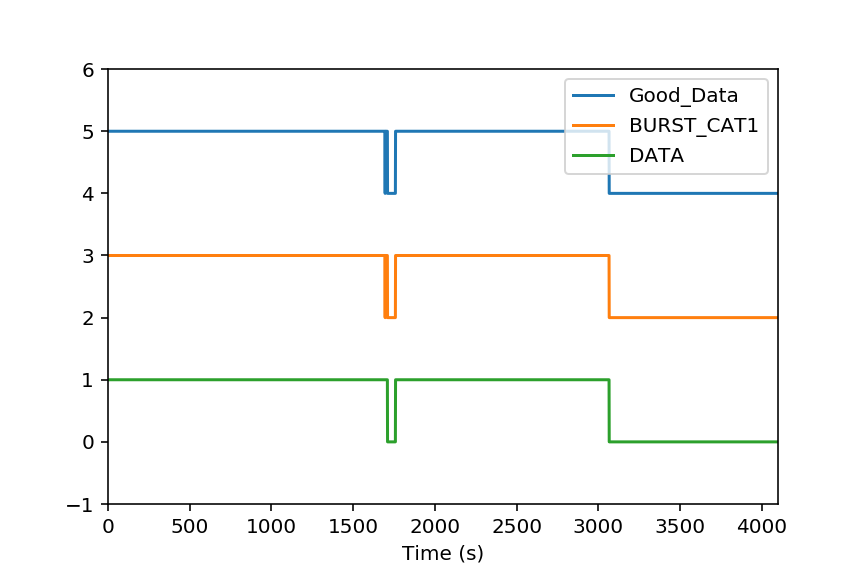

Text(0.5, 0, 'Time (s)')

In [74]:
plt.plot(goodData_1Hz + 4 , label='Good_Data')
plt.plot(burst1 +2 , label='BURST_CAT1')
plt.plot(sci , label='DATA')
plt.axis([0, 4096, -1, 6])
plt.legend(loc=1)
plt.xlabel('Time (s)')
plt.title('Visualizing passed data')